In [1]:
# svm_bench.py
import logging
import my_io
import classification_baseline
from sklearn import svm
import numpy as np
from sklearn.metrics import classification


my_io.setUp('./biological_response/')

my_io.startLog(__name__)
logger = logging.getLogger(__name__)

y,X,trainData,testData = my_io.readCsv()
portion = 0.2
seed = 1
X_test, X_train, y_train, y_test = classification_baseline.splitData(X,y,portion,seed)



2015-11-21 15:42:39,765 - my_io - INFO - logger first setup ./biological_response/log.txt
INFO:my_io:logger first setup ./biological_response/log.txt
2015-11-21 15:42:39,779 - my_io - INFO - start
INFO:my_io:start
2015-11-21 15:42:44,625 - my_io - INFO - check type of array: <type 'numpy.ndarray'>
INFO:my_io:check type of array: <type 'numpy.ndarray'>
2015-11-21 15:42:44,625 - my_io - INFO - 2d array
INFO:my_io:2d array
2015-11-21 15:42:44,648 - my_io - DEBUG - array not float, converting..
DEBUG:my_io:array not float, converting..
2015-11-21 15:42:51,890 - my_io - INFO - toFloat done
INFO:my_io:toFloat done
2015-11-21 15:42:55,265 - my_io - INFO - check type of array: <type 'numpy.ndarray'>
INFO:my_io:check type of array: <type 'numpy.ndarray'>
2015-11-21 15:42:55,265 - my_io - INFO - 2d array
INFO:my_io:2d array
2015-11-21 15:42:55,286 - my_io - DEBUG - array not float, converting..
DEBUG:my_io:array not float, converting..
2015-11-21 15:43:01,170 - my_io - INFO - toFloat done
INFO:m

In [5]:
np.shape(y_test)

(750,)

In [6]:
logger.info('init svm classifier')
svc = svm.SVC(probability = True)
logger.info('fitting svc')
svc.fit(X_train, y_train)
logger.info('start predict')
predict_probs = svc.predict_proba(X_test)

predict = my_io.toZeroOne(predict_probs[:,1])

# error = classification.zero_one_loss(y_test, predict)
loss = np.subtract(predict,y_test)
from numpy import linalg as LA
error = LA.norm(loss)
logger.info('zero one loss %d',error)

2015-11-21 15:46:12,443 - __main__ - INFO - init svm classifier
INFO:__main__:init svm classifier
2015-11-21 15:46:12,450 - __main__ - INFO - fitting svc
INFO:__main__:fitting svc
2015-11-21 15:51:28,072 - __main__ - INFO - start predict
INFO:__main__:start predict
2015-11-21 15:51:43,372 - my_io - INFO - check type of array: <type 'numpy.ndarray'>
INFO:my_io:check type of array: <type 'numpy.ndarray'>
2015-11-21 15:51:43,372 - my_io - WARNING - array dimension more than 1use the first col
2015-11-21 15:51:43,398 - my_io - INFO - maximum of probabiliy 0
INFO:my_io:maximum of probabiliy 0
2015-11-21 15:51:43,411 - my_io - INFO - minimum of probabiliy 0
INFO:my_io:minimum of probabiliy 0
2015-11-21 15:51:43,430 - my_io - INFO - toZeroOne done
INFO:my_io:toZeroOne done
2015-11-21 15:51:43,459 - __main__ - INFO - error 0
INFO:__main__:error 0


In [21]:
a = np.array([0,1])
b = np.array([1,1])
predict2 = my_io.toZeroOne(predict_probs[:,1])
error= classification.zero_one_loss(y_test,predict2)

2015-11-21 16:00:53,331 - my_io - INFO - check type of array: <type 'numpy.ndarray'>
INFO:my_io:check type of array: <type 'numpy.ndarray'>
2015-11-21 16:00:53,335 - my_io - INFO - 1d array
INFO:my_io:1d array
2015-11-21 16:00:53,342 - my_io - INFO - maximum of probabiliy 0
INFO:my_io:maximum of probabiliy 0
2015-11-21 16:00:53,351 - my_io - INFO - minimum of probabiliy 0
INFO:my_io:minimum of probabiliy 0
2015-11-21 16:00:53,355 - my_io - INFO - toZeroOne done
INFO:my_io:toZeroOne done


In [15]:
float(3)/2

1.5

In [23]:
logger.info('zero one loss %f',error)

2015-11-21 16:01:08,315 - __main__ - INFO - zero one loss 0.250667
INFO:__main__:zero one loss 0.250667


In [55]:
originx = np.array([[18,2,66,2],[2,90,4,5]])
"""NOEMALIZE Summary of this function goes here
    normalize data such that they are spread aroung 0
    noticed that the dimension should be N*D 
    ie, normalize each row
    Detailed explanation goes here
"""
meanX = np.mean(originx, 0)
stdX = np.std(originx, 0)

normalizedX = np.array(originx,dtype='f8')

print meanX 
print stdX 
print normalizedX
for i in range(len(meanX)):
    for j in range(len(originx)):
        normalizedX[j,i] = np.subtract(normalizedX[j,i], meanX[i])
        print normalizedX[j,i]
        normalizedX[j,i] = np.divide(normalizedX[j,i], stdX[i])
        print normalizedX[j,i]


[ 10.   46.   35.    3.5]
[  8.   44.   31.    1.5]
[[ 18.   2.  66.   2.]
 [  2.  90.   4.   5.]]
8.0
1.0
-8.0
-1.0
-44.0
-1.0
44.0
1.0
31.0
1.0
-31.0
-1.0
-1.5
-1.0
1.5
1.0


In [56]:
np.divide(3.0,2)

1.5

In [44]:
normalizedX

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [61]:
# test kmeans.py
import logging
import kmeans
import numpy as np
import my_io

# initialize
my_io.startLog(__name__)
logger = logging.getLogger(__name__)


# for small size of data, use genfromtxt which return array
# for large size, use csv.reader return str array
X = np.genfromtxt('./faithful.txt')
logger.info('import data, in shape %s',str(np.shape(X)))

# for k means, initilize k
k = 4

2015-11-22 16:01:00,226 - __main__ - INFO - import data, in shape (272, 2)
INFO:__main__:import data, in shape (272, 2)


In [73]:
import kmeans
X = kmeans.normalize(X)
k_means = KMeans(n_clusters=4)
k_means.fit(X)

[  3.48778309  70.89705882]
[  1.13927121  13.56996002]
[[  3.6    79.   ]
 [  1.8    54.   ]
 [  3.333  74.   ]
 [  2.283  62.   ]
 [  4.533  85.   ]
 [  2.883  55.   ]
 [  4.7    88.   ]
 [  3.6    85.   ]
 [  1.95   51.   ]
 [  4.35   85.   ]
 [  1.833  54.   ]
 [  3.917  84.   ]
 [  4.2    78.   ]
 [  1.75   47.   ]
 [  4.7    83.   ]
 [  2.167  52.   ]
 [  1.75   62.   ]
 [  4.8    84.   ]
 [  1.6    52.   ]
 [  4.25   79.   ]
 [  1.8    51.   ]
 [  1.75   47.   ]
 [  3.45   78.   ]
 [  3.067  69.   ]
 [  4.533  74.   ]
 [  3.6    83.   ]
 [  1.967  55.   ]
 [  4.083  76.   ]
 [  3.85   78.   ]
 [  4.433  79.   ]
 [  4.3    73.   ]
 [  4.467  77.   ]
 [  3.367  66.   ]
 [  4.033  80.   ]
 [  3.833  74.   ]
 [  2.017  52.   ]
 [  1.867  48.   ]
 [  4.833  80.   ]
 [  1.833  59.   ]
 [  4.783  90.   ]
 [  4.35   80.   ]
 [  1.883  58.   ]
 [  4.567  84.   ]
 [  1.75   58.   ]
 [  4.533  73.   ]
 [  3.317  83.   ]
 [  3.833  64.   ]
 [  2.1    53.   ]
 [  4.633  82.   ]
 [  2.     59

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [59]:
k_means

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [74]:
Z = k_means.predict(X)
# Z = Z.reshape(xx.shape)

In [66]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [75]:
Z

array([3, 2, 3, 0, 1, 0, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 0, 1, 2, 3, 2, 2, 3,
       3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 1, 0, 1, 1, 0, 1, 0, 3, 3,
       3, 2, 1, 0, 1, 1, 2, 1, 2, 1, 3, 0, 1, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0,
       3, 1, 0, 1, 3, 0, 1, 0, 1, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1, 2, 1, 0, 1,
       2, 1, 0, 3, 1, 3, 2, 1, 0, 1, 2, 1, 3, 2, 1, 2, 1, 3, 1, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 3, 3, 0, 1, 3, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 3, 1, 0, 1, 1, 3, 0, 1, 2, 1, 2, 1, 3, 0, 1, 3, 3, 1, 1, 2, 1, 2,
       1, 0, 3, 3, 3, 0, 1, 2, 1, 2, 0, 1, 3, 1, 1, 3, 2, 1, 3, 2, 1, 1, 3,
       2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 3, 1, 1, 3, 2, 1, 0, 1, 1, 2, 1, 2, 3,
       1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3, 1,
       3, 2, 1, 2, 1, 2, 2, 3, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 2, 1, 3,
       3, 1, 3, 3, 1, 0, 3, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 2, 3])

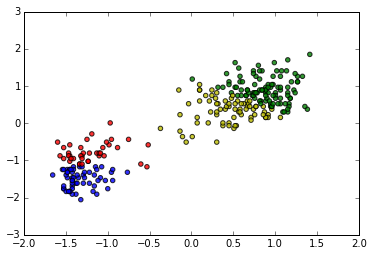

In [76]:
ax = plt.gca()
colors_list = ['r','g','b','y']
colors = [colors_list[int(Z[i])] for i in range(272)]
# colors = 'r'
ax.scatter(X[:,0], X[:,1], c=colors,alpha=0.8)
plt.show()

In [77]:
K = 4
r = Z
Mu = np.zeros((K, 2))
for k in range(0, K):
    # indexArray = r == k
    xk = [X[idx,:] for idx in range(len(r)) if r[idx] == k] 
    # xk: Nk x D
    logger.info(' in group %d, num of points %s', k, str(np.shape(xk)))
    Mu[k,:] = np.mean(xk, 0)  # 0: cal mean along each column


2015-11-22 16:09:15,153 - __main__ - INFO -  in group 0, num of points (39, 2)
INFO:__main__: in group 0, num of points (39, 2)
2015-11-22 16:09:15,160 - __main__ - INFO -  in group 1, num of points (102, 2)
INFO:__main__: in group 1, num of points (102, 2)
2015-11-22 16:09:15,170 - __main__ - INFO -  in group 2, num of points (58, 2)
INFO:__main__: in group 2, num of points (58, 2)
2015-11-22 16:09:15,178 - __main__ - INFO -  in group 3, num of points (73, 2)
INFO:__main__: in group 3, num of points (73, 2)


In [78]:
N = 272
Ln = [LA.norm(np.subtract(X[n, :], Mu[int(r[n]), :])) for n in range(0, N)]

In [79]:
np.mean(Ln)

0.35124907541182904

In [84]:
	pi_k = np.zeros((k,1))
	pi_k = [np.divide(len(np.where(r==kth)[0]), float(N)) for kth in range(k) ]

In [85]:
pi_k

[0.14338235294117646, 0.375, 0.21323529411764705, 0.26838235294117646]

In [83]:
k = 4

In [237]:
p = np.zeros((N,k))
p[1][3] = 2
print p

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  2.]
 [ 0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [ ]:
""" E STEP
"""
member_k = [X[r==kth,:] for kth in range(k)]
# list of length k, each element if the array of the member in that group

info = [len(member_k[i]) for i in range(k)]
# print info
# logger.info('members:',str(info))

(N, D) = np.shape(X)

# for ith group
# mean_k = np.mean(member_k[i],0)

# print 'members #',len(member_k[i])

"""
diff = [np.subtract(mean_k, member_ki[n]) for n in range(len(member_k[i]))]
prod = np.multiply(member_ki[:,1],member_ki[:,0])
conv = np.sum(prod)
conv = np.divide(conv, N)
"""
D = 2
guans = k*[[0]]
cova_list = k*[0]
mean_k_list = k*[0]
for idx_k in range(k):
#    print idx_k
    mean_k = np.mean(member_k[idx_k],0) # mean vector of group idx_k , D*1
    mean_k_list[idx_k] = mean_k
    member_ki = member_k[idx_k] # all the member in idx_k th group
    # print 'members #',len(member_k[i])
    
    # now D*N_k
    cova = np.cov(np.transpose(member_ki)) 
    cova_list[idx_k] = cova
    # convalence matrix, D*D
    # logger.info('dimen check cov' if (np.shape(conva)==(D,D)).all else logger.error('dimen check fail'))
    guans_append = [guassan_distribute(cova, mean_k, member_ki[j], 2) for j in range(len(member_ki))]
    # print type(guans_append)
    guans[idx_k] = guans_append # len[4] list, sublist is len[Nk] ie guans[k][n]
    
    # np.array(guans_append)
    # print len(guans)
p = np.zeros((k, N))
print np.shape(p)
for n in range(N):
    # print N
    pi_N = [pi_k[kk] * guassan_distribute(cova_list[kk], mean_k_list[kk], X[n,:], D) for kk in range(k)]
    deno = np.sum(pi_N)
    
    for idx_k in range(k):
        # print n,idx_k
        # p[n][idx_k]
        # p[n][idx_k] = (pi_k[r[n]] * guassan_distribute(cova_list[r[n]], mean_k_list[r[n]], X[n,:], D)) / deno
        p[idx_k][n] = (pi_k[idx_k] * guassan_distribute(cova_list[idx_k], mean_k_list[idx_k], X[n,:], D)) / deno

In [305]:
""" M STEP
"""
mu_old = mean_k_list
mu_new = np.zeros((k,D))
cova_new = k*[0]
pi_k_new = np.zeros((k,1))
N_k = [np.sum(p[idx_k]) for idx_k in range(k)]

# update mu
for idx_k in range(k):
    nomi = [p[idx_k][n]*X[n,:] for n in range(N)]
    nomi = np.sum(nomi, 0) # DX1
    deno = N_k[idx_k] # 1X1
    mu_new[idx_k] = np.divide(nomi,deno)
    # print np.shape(mu_new[idx_k])
    
# update conv
for idx_k in range(k):
    deno = N_k[idx_k] 
    nomi = [ p[idx_k][n]* np.transpose(np.matrix((X[n,:] - mu_old[idx_k]))) * 
            np.matrix((X[n,:] - mu_old[idx_k])) for n in range(N)] # member in n th group
    nomi2 = np.sum(nomi,0) # sum vectors in col dimension
    cova_new[idx_k] = np.divide(np.matrix(nomi2),deno)
    
for idx_k in range(k):
    pi_k_new[idx_k] = (1/N) * np.sum(p[idx_k])
    
return mu_new, cova_new, pi_k_new

(2,)
(2,)
(2,)
(2,)


In [308]:
np.shape(r
    )
np.ln(math.exp(1))

AttributeError: 'module' object has no attribute 'ln'

In [215]:

import math

def guassan_distribute(cova, mu, xn, d):
    # d = 2
    # s(np.matrix(xn-mu))
    denomi = math.pow(2*math.pi,2*d) * math.pow(np.linalg.det(cova), 0.5)
    # print denomi
    out = (1.0/ denomi)* math.exp(-0.5*np.matrix(xn-mu)*np.matrix(cova)*np.transpose(np.matrix(xn-mu)))
    return out

In [205]:

np.shape(cova)
xn = member_ki[0]
mu = mean_k
d = 2
print member_ki[1][1]
s(member_ki)
s(xn)
s(mu)
np.shape(xn-mu)
s(np.matrix(xn-mu))
denomi = math.pow(2*math.pi,2*d) * math.pow(np.linalg.det(cova), 0.5)
out = (1.0/ denomi)* math.exp(-0.5*np.matrix(xn-mu)*np.matrix(cova)*np.transpose(np.matrix(xn-mu)))


-1.17148899502
(39, 2)
(2,)
(2,)
(1, 2)


ZeroDivisionError: float division by zero

In [180]:
def s(a):
    print np.shape(a)

0.007388049906547692

In [130]:
conv

0.30143363246040428

In [154]:
(xn-mu)

array([ 0.16840832,  0.34750922])

In [155]:
np.transpose(xn-mu)

array([ 0.16840832,  0.34750922])

In [161]:
math.exp(-0.5*np.transpose(xn-mu)*cova*(xn-mu))

TypeError: only length-1 arrays can be converted to Python scalars

In [169]:
np.transpose(np.matrix(xn-mu))

matrix([[ 0.16840832],
        [ 0.34750922]])

In [170]:
np.matrix(xn-mu)*np.matrix(cova)*np.transpose(np.matrix(xn-mu))

matrix([[ 0.01397705]])

In [171]:
cova

array([[ 0.06729471, -0.0138743 ],
       [-0.0138743 ,  0.11338291]])

In [172]:
np.matrix(cova)

matrix([[ 0.06729471, -0.0138743 ],
        [-0.0138743 ,  0.11338291]])

In [175]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [176]:
np.matrix(a)

matrix([[1, 2],
        [3, 4]])